## 1.  **Importing Libraries and Loading Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load data
data = pd.read_csv(r"C:\Users\Shivam Mishra\Downloads\index.csv")
print(data.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [23]:
print(data.columns)

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'Month', 'Weekday', 'Hour', 'month', 'weekday', 'hour'],
      dtype='object')


# 2. **Data Cleaning**
* ## Handling missing values
* ## Converting columns to appropriate types

In [15]:
# Check for missing values
print(data.isnull().sum())

# Fill missing 'card' values with 'Unknown'
data['card'].fillna('Unknown', inplace=True)

# Convert date columns to datetime
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

# Create new columns for analysis
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.weekday
data['hour'] = data['datetime'].dt.hour

print(data.info())


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
Month           0
Weekday         0
Hour            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   Month        1133 non-null   object        
 7   Weekday      1133 non-null   object        
 8   Hour         1133 non-null   int32         
 9   month        1133 non-null   int32         
 10  weekday      1133 non-null   int32         
 11  hour         1133 non-null   int32         
dtypes: datetime64[ns](2), float

C:\Users\Shivam Mishra\AppData\Local\Temp\ipykernel_3724\342666330.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['card'].fillna('Unknown', inplace=True)


# 3. Total Revenue Analysis
* ## Visualize total revenue by product

C:\Users\Shivam Mishra\AppData\Local\Temp\ipykernel_3724\1956641302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_product, x='money', y='coffee_name', palette='viridis')


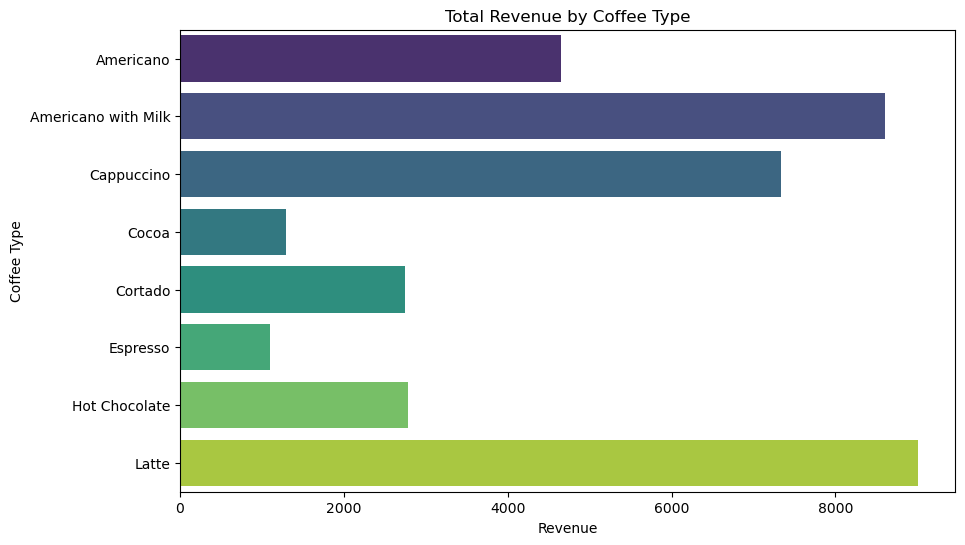

In [16]:
# Group data by coffee_name and calculate total revenue
revenue_by_product = data.groupby('coffee_name')['money'].sum().reset_index()

# Plot the revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_product, x='money', y='coffee_name', palette='viridis')
plt.title('Total Revenue by Coffee Type')
plt.xlabel('Revenue')
plt.ylabel('Coffee Type')
plt.show()


# 4. Monthly Sales Trends
* ##  Analyze monthly sales by product.

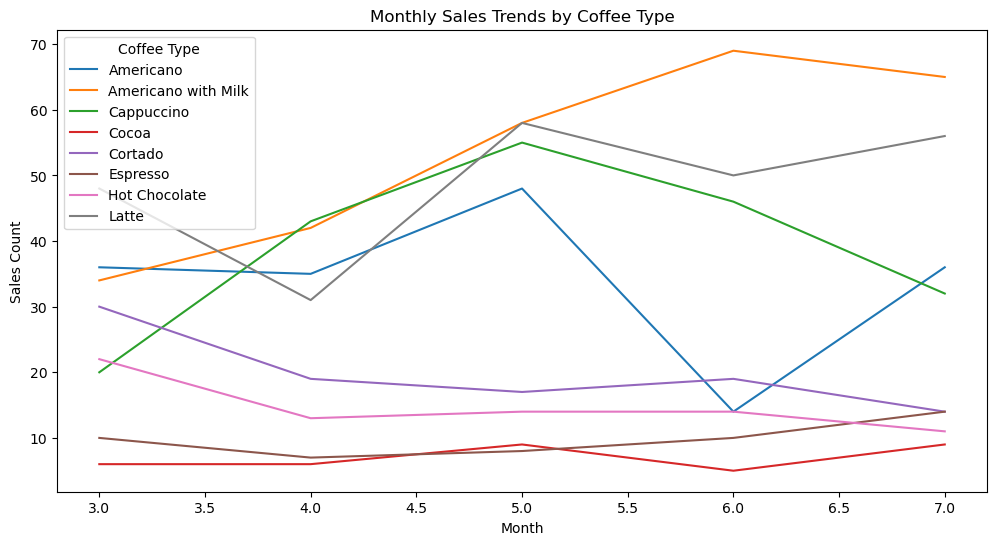

In [17]:
# Group by month and coffee_name
monthly_sales = data.groupby(['month', 'coffee_name']).size().unstack(fill_value=0)

# Plot monthly sales
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sales Trends by Coffee Type')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend(title='Coffee Type')
plt.show()


# 5. Daily Sales Trends
## - Analyze sales count by day of the week.

C:\Users\Shivam Mishra\AppData\Local\Temp\ipykernel_3724\2567994416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_sales, x='weekday', y='money', palette='coolwarm')


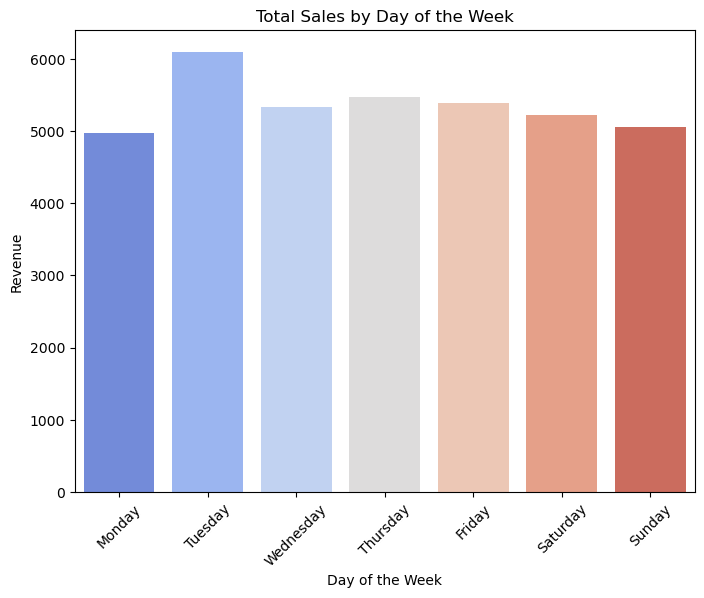

In [18]:
# Group by weekday
weekday_sales = data.groupby('weekday')['money'].sum().reset_index()

# Replace weekday numbers with names
weekday_sales['weekday'] = weekday_sales['weekday'].replace({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Plot weekday sales
plt.figure(figsize=(8, 6))
sns.barplot(data=weekday_sales, x='weekday', y='money', palette='coolwarm')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


# 6. Hourly Sales Analysis
* ## Analyze sales distribution by hour of the day.

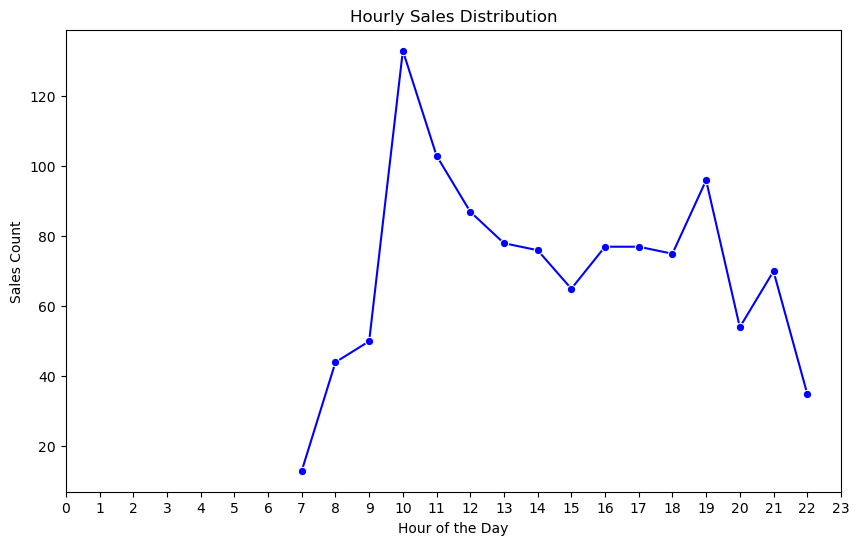

In [19]:
# Group by hour
hourly_sales = data.groupby('hour').size().reset_index(name='count')

# Plot hourly sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sales, x='hour', y='count', marker='o', color='blue')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.xticks(range(0, 24))
plt.show()


# 7. Coffee Popularity
* ## Find and visualize the most popular coffee types

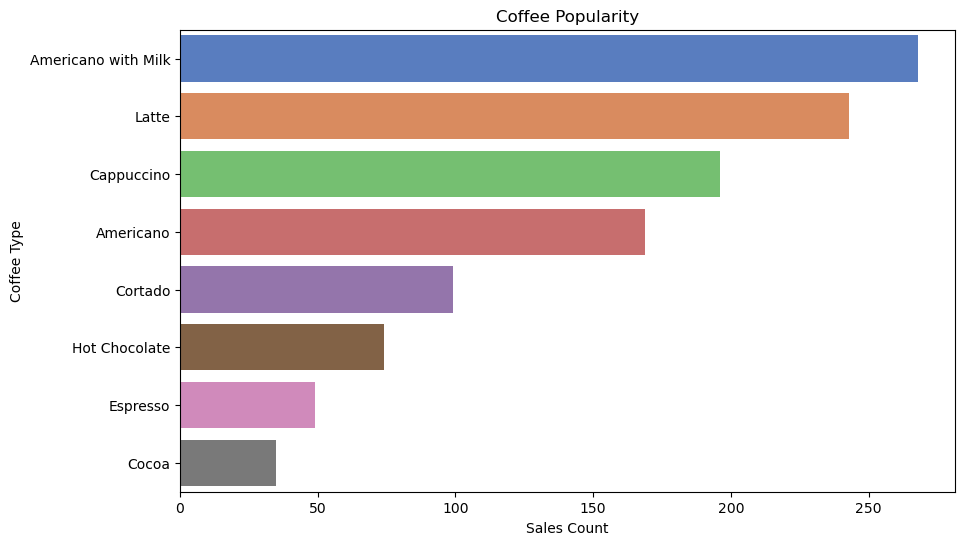

In [22]:
# Count sales per coffee type
coffee_popularity = data['coffee_name'].value_counts().reset_index()
coffee_popularity.columns = ['coffee_name', 'count']

# Plot coffee popularity
# Updated code for Coffee Popularity plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_popularity, x='count', y='coffee_name', hue='coffee_name', dodge=False, palette='muted', legend=False)
plt.title('Coffee Popularity')
plt.xlabel('Sales Count')
plt.ylabel('Coffee Type')
plt.show()



# 8. Peak Hours for Each Coffee Type
* ## Analyze hourly sales for each coffee type.

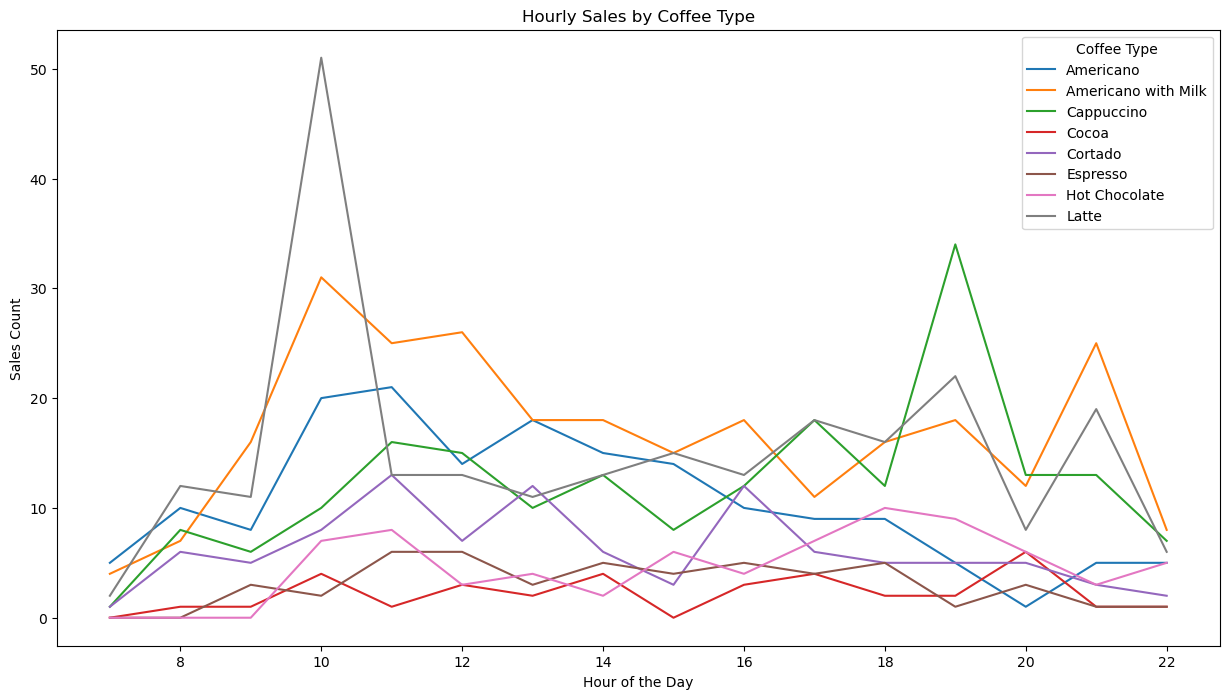

In [21]:
# Group by hour and coffee_name
hourly_coffee_sales = data.groupby(['hour', 'coffee_name']).size().unstack(fill_value=0)

# Plot for each coffee type
hourly_coffee_sales.plot(kind='line', figsize=(15, 8))
plt.title('Hourly Sales by Coffee Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.legend(title='Coffee Type')
plt.show()


Conclusions

### **Conclusions from this data**

1. **Top-Selling Coffee Products:**
   - **Latte** and **Americano with Milk** are the most popular coffee products, consistently generating high sales and revenue.
   - Less popular products like **Cocoa** and **Espresso** may require targeted promotions or adjustments in pricing or availability.

2. **Revenue Insights:**
   - **Latte** is the product with the highest revenue, indicating its strong customer preference and potential for profitability.
   - Revenue distribution aligns closely with sales volume trends, emphasizing the importance of popular items.

3. **Sales Trends by Time:**
   - **Peak Hours:**
     - The busiest times for sales are around **10:00 AM** and **7:00 PM**, with the morning peak likely driven by customers grabbing coffee before work.
   - **Daily Trends:**
     - Sales are evenly distributed throughout the week, with a slight increase on **Tuesdays**.
   - **Hourly Trends:**
     - Morning beverages like **Latte** and **Americano** dominate during early hours, while products like **Cappuccino** and **Hot Chocolate** see more traction in the evening.

4. **Customer Preferences:**
   - Card payments dominate transactions (~92%), showing a clear trend toward cashless payment systems.
   - Popular products such as **Latte**, **Americano with Milk**, and **Cappuccino** highlight customer preferences for classic and creamy coffee options.

5. **Recommendations:**
   - **Restocking and Inventory Management:**
     - Ensure adequate inventory for high-demand items, especially during peak hours and on high-sales days like Tuesday.
   - **Targeted Promotions:**
     - Promote less popular items like **Cocoa** and **Espresso** during off-peak hours to boost their sales.
   - **Optimizing Machine Layout:**
     - Place popular products in easily accessible spots on vending machines.
   - **Seasonal Trends:**
     - Monitor changes in preferences for warm beverages during colder months to adjust stock levels.

6. **Future Analysis Opportunities:**
   - Predicting future sales using machine learning to prepare for high-demand periods.
   - Segmenting customers based on preferences for specific coffee types or payment methods.
